In [27]:
import numpy as np

import pandas as pd
import pylab as pl

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Custom library
from utils import preprocess_image

Text(0.5,0.98,'Udacity Steering Angle Distribution')

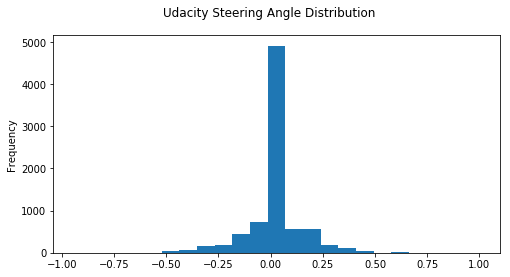

In [3]:
csv_header = ['center','left','right','steering','throttle','brake','speed']

# Plot Udacity's CSV data
Udacity_df = pd.read_csv('data/udacity_data/driving_log.csv',names=csv_header)
Udacity_df['steering'].plot.hist(bins=23,figsize=(8,4))
pl.suptitle("Udacity Steering Angle Distribution")

Text(0.5,0.98,'One Lap Steering Angle Distribution')

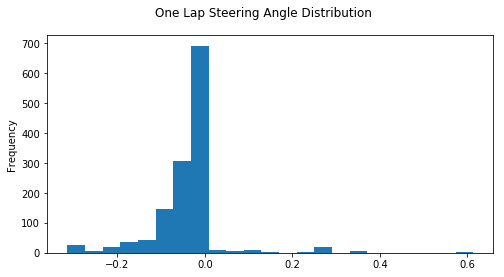

In [4]:
# Plot recorded one lap CSV data
one_lap_df = pd.read_csv('data/one_lap/driving_log.csv',names=csv_header)
one_lap_df['steering'].plot.hist(bins=23,figsize=(8,4))
pl.suptitle("One Lap Steering Angle Distribution")

Text(0.5,0.98,'Two Laps Steering Angle Distribution')

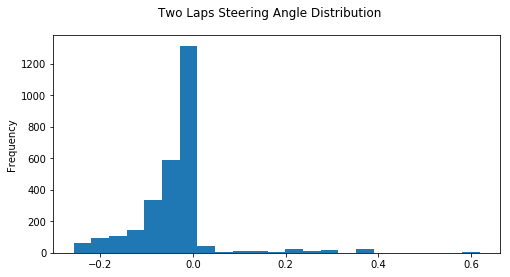

In [5]:
# Plot recorded two laps CSV data
two_laps_df = pd.read_csv('data/two_laps/driving_log.csv',names=csv_header)
two_laps_df['steering'].plot.hist(bins=23,figsize=(8,4))
pl.suptitle("Two Laps Steering Angle Distribution")

Text(0.5,0.98,'Sharp Left Angle Distribution')

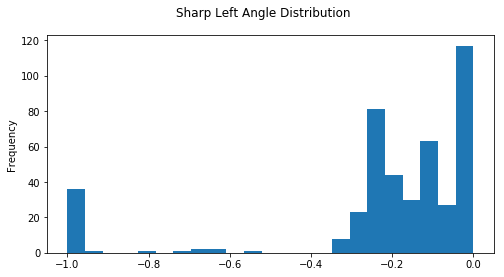

In [7]:
# Plot sharp left CSV data
two_laps_df = pd.read_csv('data/newdata_sharp_left/driving_log.csv',names=csv_header)
two_laps_df['steering'].plot.hist(bins=23,figsize=(8,4))
pl.suptitle("Sharp Left Angle Distribution")

Text(0.5,0.98,'Sharp Right Steering Angle Distribution')

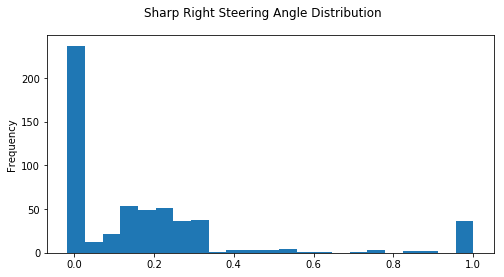

In [8]:
# Plot sharp right CSV data
two_laps_df = pd.read_csv('data/newdata_sharp_right/driving_log.csv',names=csv_header)
two_laps_df['steering'].plot.hist(bins=23,figsize=(8,4))
pl.suptitle("Sharp Right Steering Angle Distribution")

Text(0.5,0.98,'Two Laps Steering Angle Distribution')

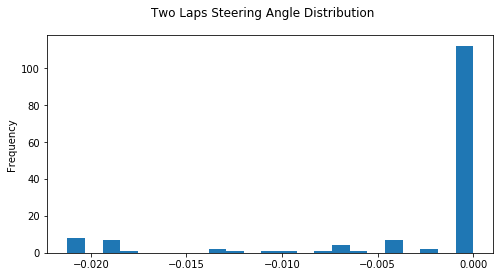

In [9]:
# Plot bridge CSV data
two_laps_df = pd.read_csv('data/newdata_bridge/driving_log.csv',names=csv_header)
two_laps_df['steering'].plot.hist(bins=23,figsize=(8,4))
pl.suptitle("Two Laps Steering Angle Distribution")

Text(0.5,0.98,'Two Laps of Clockwise and Anti-clockwise Steering Angle Distribution')

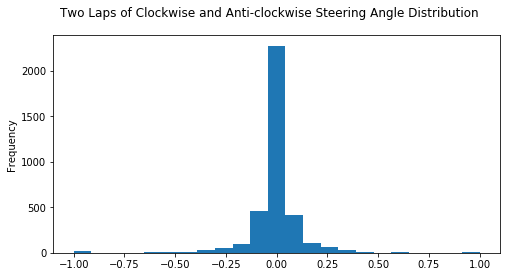

In [10]:
# Plot anti-clockwise and clockwise CSV data
two_laps_clockwise_anticlockwise_df = pd.read_csv('data/clockwise_anti_clockwise_lap/driving_log.csv',names=csv_header)
two_laps_clockwise_anticlockwise_df['steering'].plot.hist(bins=23,figsize=(8,4))
pl.suptitle("Two Laps of Clockwise and Anti-clockwise Steering Angle Distribution")

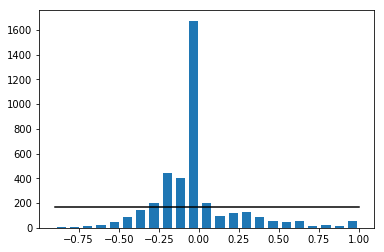

In [29]:
# Experiment with current dataset

data_df = pd.read_csv('data/mydata_best_augmented/driving_log.csv',names=csv_header)
# new_df = data_df[(data_df.steering < -0.05) | (data_df.steering > 0.05)]
new_df = data_df
X = new_df[['center', 'left', 'right']].values
y = new_df['steering'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

steering_angles = y_train
# print a histogram to see which steering angle ranges are most overrepresented
num_bins = 23
avg_samples_per_bin = len(steering_angles)/num_bins
hist, bins = np.histogram(steering_angles, num_bins)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.plot((np.min(steering_angles), np.max(steering_angles)), (avg_samples_per_bin, avg_samples_per_bin), 'k-')


## Create filtered/adjusted dataset

Text(0.5,0.98,'Adjusted Steering Angles Distribution')

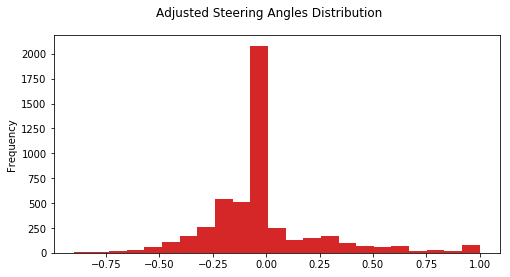

In [31]:
# Not used - for experimentiation only
# # Filter out the +/- 0.05 degrees of steering
# new_df_normal = new_df_normal[(new_df_normal.steering < -0.05) | (new_df_normal.steering > 0.05)]
# # Make the distirbution within 2 standard deviation
# new_df_normal = new_df[np.abs(new_df.steering-new_df.steering.mean()) <= (2*new_df.steering.std())]
# new_df_normal['steering'].plot.hist(bins=23)

# Random 2000 samples of near straight driving
straight_steering_sample = data_df[(-0.01 < data_df.steering) & (data_df.steering <= 0)]
straight_steering_sample = straight_steering_sample.sample(2000)

# Non neutral steering
non_straight_steering = data_df[(data_df.steering < -0.1) | (data_df.steering > 0)]

# Combined data frame
combined_df = pd.concat([non_straight_steering, straight_steering_sample], axis=0)

# Write the data frame back to csv
# combined_df.to_csv(driving_log, header=False, index=False)

# Display the individual distribution
data_df['steering'].plot.hist(bins=23,figsize=(8,4))
pl.suptitle("Mixed Driving Steering Angles")

straight_steering_sample['steering'].plot.hist(bins=23)
pl.suptitle("Near Neural Steering Angles histogram")

non_straight_steering['steering'].plot.hist(bins=23)
pl.suptitle("Non-Neural Steering Angles histogram")

combined_df['steering'].plot.hist(bins=23)
pl.suptitle("Adjusted Steering Angles Distribution")

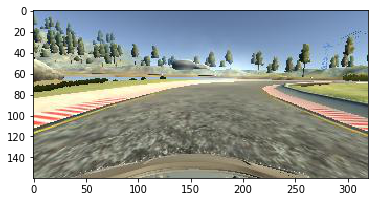

In [17]:
# Visualize the cropped resized image
# train_samples,validation_samples = import_data(driving_log)
# img = mpimg.imread('data/newdata_bridge/IMG/center_2019_10_27_17_24_27_670.jpg') 
img = mpimg.imread('data/newdata_sharp_right/IMG/center_2019_10_27_17_30_58_594.jpg') 
plt.imshow(img)

(66, 200, 3)


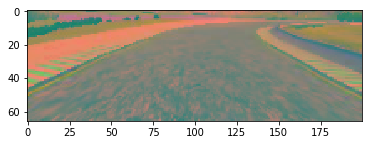

In [21]:
processed_img = preprocess_image(img)
print(processed_img.shape)
plt.imshow(processed_img)

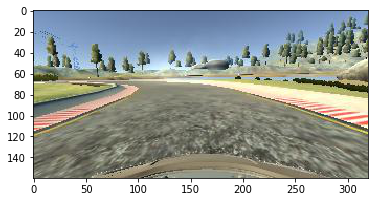

In [23]:
plt.imshow(np.fliplr(img))